## Customer segmentation - Unsupervised learning - K-means

---

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset as a pandas dataframe
df = pd.read_csv('Cust_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
# Shape of the dataframe
df.shape

(850, 10)

In [4]:
# Type of variables we have in the dataframe => address is an object
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [5]:
# This variable is likely not to be needed for the scope of segmentation of the customers, therefore dropping as well as ID of the customer
df.drop(columns = ['Customer Id','Address'], inplace = True)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
# We check missing data
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
# We drop row with missing data
df.dropna(axis = 0, inplace = True)

In [8]:
# We will proceed now with the Kmeans algorithm to find the clusters of customers we have
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

C:\Users\Sergio\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
X = df.values

In [10]:
Xnorm = StandardScaler().fit(X).transform(X)

In [11]:
Nclust = 4 # Numbers of clusters considered

In [12]:
Km = KMeans(init = 'k-means++', n_init = 12, n_clusters = Nclust).fit(Xnorm)

In [13]:
labels = Km.labels_
print(labels)

[1 3 2 1 0 1 1 3 2 1 2 1 1 1 1 2 3 0 1 1 1 3 3 2 1 2 2 1 2 0 2 0 3 1 1 3 3
 2 2 2 2 1 3 3 3 3 3 3 1 1 3 2 1 2 1 1 3 1 1 1 1 0 3 0 3 3 2 2 3 1 2 2 1 1
 2 1 2 3 2 2 0 1 1 3 3 1 1 2 1 1 3 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 3 2 2 1
 1 1 0 1 2 1 1 1 2 1 3 3 2 2 3 3 1 1 1 1 1 1 1 3 1 1 2 1 2 3 1 2 3 2 1 1 0
 2 2 1 1 3 2 3 1 3 0 1 3 2 1 2 1 3 3 2 1 1 1 2 2 3 2 3 1 1 1 1 0 1 2 3 1 3
 3 3 1 2 3 1 1 1 1 3 3 1 1 1 1 1 3 2 3 2 1 1 3 2 3 2 3 1 1 2 1 1 2 2 2 1 1
 3 1 3 3 1 3 3 1 1 2 1 1 2 1 2 3 3 3 1 1 2 1 3 2 1 1 1 1 3 2 2 0 1 2 1 1 2
 2 3 3 3 0 2 1 1 2 1 3 3 3 3 2 3 1 1 1 1 1 0 1 1 1 1 1 0 1 1 3 2 1 2 3 1 3
 3 3 3 2 1 3 2 2 1 3 2 1 1 1 1 0 1 3 1 1 1 1 2 1 2 1 3 1 1 1 2 1 1 2 2 3 1
 3 3 2 2 3 2 3 3 2 1 3 1 2 1 1 3 2 1 0 1 1 1 3 3 1 3 1 0 2 1 1 3 1 0 2 1 1
 0 1 2 1 3 1 0 1 1 1 1 3 1 1 2 3 3 3 3 2 3 1 1 2 2 1 1 1 1 3 3 2 2 1 3 1 1
 1 2 0 2 2 2 2 1 1 2 3 2 2 1 2 0 3 2 1 2 3 2 1 2 1 2 2 2 1 3 0 1 2 1 1 2 1
 2 3 3 3 2 1 3 1 3 1 3 1 2 1 3 1 2 2 3 1 0 1 1 0 1 2 1 2 1 2 2 3 0 2 1 3 2
 3 1 1 3 2 2 1 3 3 1 3 2 

In [14]:
df['Clust'] = labels # assignation of labels of each centroid to the different events

In [15]:
df.groupby(['Clust']).size() # seeing how many events correspond to each centroid

Clust
0     38
1    329
2    165
3    168
dtype: int64

In [16]:
df.groupby('Clust').mean() # finding the centroid coordinates

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clust,,,,,,,,
0,43.052632,2.368421,17.210526,129.657895,7.197684,12.559474,0.500000,18.828947
1,32.145897,1.638298,5.896657,30.583587,0.652787,1.538742,0.000000,7.543769
2,31.696970,1.896970,3.921212,31.424242,1.594261,2.823733,0.975758,14.071515
3,41.428571,1.571429,15.660714,69.922619,2.000976,4.114970,0.017857,9.900000


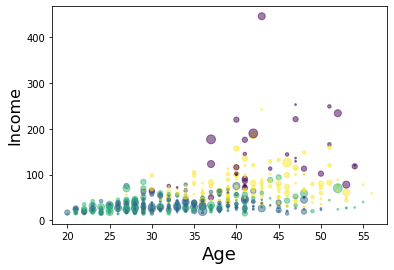

In [17]:
# Visualizing the categories found plotting Income as a function of the age
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

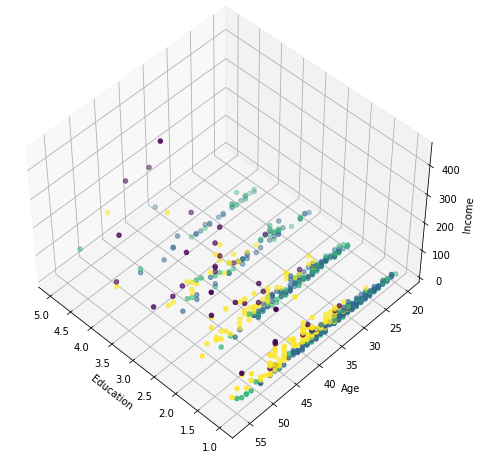

In [18]:
# We include in the analysis the education, therefore we now need a 3D plot
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6));
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134);

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))